# Práctica 1: Aprendizaje automático

__Fecha de entrega: 9 de marzo de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

## Apartado 3: Regresión

__Número de grupo: 2__

__Nombres de los estudiantes: Alberto Almagro Sánchez, Juan Carlos Llamas Núñez y Enrique Rey Gisbert__

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino. 

La calidad del vino es una variable que toma valores entre 0 y 10. 

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal. 

In [1]:
RANDOM_STATE = 42

### 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe. 

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

Empezamos generando el dataframe del fichero de datos 'calidad_vinos.csv'. Además, lo mostramos y calculamos el número de filas de cada uno de los valores que toma la variable de salida quality para estudiar si están equilibrados.

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
df = pd.read_csv('calidad_vinos.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# ¿Equilibradas?
df['quality'].value_counts() / df['quality'].count() * 100

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

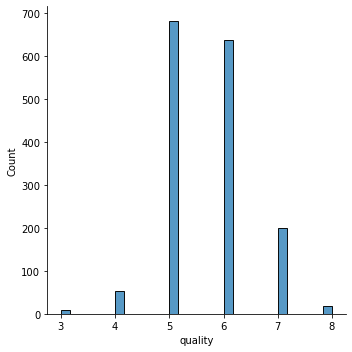

In [5]:
import seaborn as sns
sns.displot(df['quality'],height=5,aspect = 1)

Al examinar el gráfico anterior, vemos que los datos iniciales no estan equilibrados respecto a los valores que puede tomar la variable quality. En cambio, el gráfico sigue una distribución similar a la normal, habiendo muchas muestras de vinos de calidades centrales 4 y 5, y muy pocas de vinos de calidades en los extremos, como 3 y 8.

Ahora, pasamos a calcular los estadísticos de la media, desviación típica, minimo, máximo y percentiles de las variables que tenemos en nuestro dataframe.

In [6]:
# Media, desviación típica, minimo, maximo y percentiles de las variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Estudiando los datos que obtenemos, observamos que total sulfur dioxide es la que tiene valores extremos más acusados respecto a la media con alta desviación típica y density es la que está más concentrada respecto a su media con baja desviación típica. Esto nos está diciendo que la variable density toma valores muy similares en todos los vinos que se han analizado, lo cual es posible que haga que no tenga mucha relevacia a la hora de entrenar el perceptrón multicapa. Sin embargo, la variable total sulfur dioxide toma un rango de valores amplio y difiere mucho entre unos tipos de vino y otros, lo cual a priori nos puede decir que nos ayudará de forma relevante durante el entrenamiento del perceptrón multicapa. Con todo, no nos atrevemos a pronosticar en una primera aproximación la influencia que vaya a tener cada una de estas variables dentro de nuestro modelo. Esto se debe al funcionamiento opaco para el usuario del perceptrón multicapa y a su difícil intrepretabilidad, que contrasta con la de otras técnicas estudiadas como los árboles de decisión.

### 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga la calidad del vino y las variables que estén más correlacionadas con esa variable (estableciendo para ello un valor umbral que consideres adecuado).

In [7]:
# Coeficientes de correlación entre la variable de salida quality y el resto de variables
x = df.corr()
todo_menos_quality = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
x.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1).hide_columns(todo_menos_quality)

,quality
fixed acidity,0.12
volatile acidity,-0.39
citric acid,0.23
residual sugar,0.014
chlorides,-0.13
free sulfur dioxide,-0.051
total sulfur dioxide,-0.19
density,-0.17
pH,-0.058
sulphates,0.25


Viendo los resultados obtenidos de la correlación entre la variable quality y el resto, decidimos coger el umbral de 0.2 para la selección de las variables más correlacionadas, lo cual nos deja con las siguientes 4 variables:

In [8]:
df_ref = x[abs(x['quality']) > 0.2]['quality']
df_ref = df_ref[abs(x['quality']) < 1]
df_ref

volatile acidity   -0.390558
citric acid         0.226373
sulphates           0.251397
alcohol             0.476166
Name: quality, dtype: float64

Según el equipo de expertos enólogos del Master en Enología y Viticultura del IMF (https://blogs.imf-formacion.com/blog/corporativo/calidad/evaluar-calidad-vino/) entre los factores fisioquímicos que más afectan a la calidad del vino encontramos:

    - Grado Alcohólico -> Importante para conservar las propiedades del vino y el equilibrio sensorial.
    - Contenido en Azúcares Residuales -> Diferente según el vino (seco, agridulce o semiseco)
    - Acidez Volátil -> Su elevación puede provocar el defecto “Picado Acético”.
    - Acidez Total -> Expresada en gramos de ácido tartárico por litro.
    - Anhidrido Sulfuroso o Sulfitos -> Antioxidante que protege al vino durante su comercialización.
    
Vemos que entre las variables que más correlación tienen con la calidad del vino según nuestros calculos basados en los datos que tenemos, encontramos efectivamente el alcohol, que ayuda a mantener las propiedades del vino, con correlación de 0.476166. Además, también tenemos los sulfitos con correlación positiva de 0.251397 y la acidez volátil con correlación negativa de -0.390558 ya que conviene tener una cantidad reducida para un vino de buena calidad, como se explica en el artículo del IMF. Por último, según los expertos de la tienda 'Vinos y Cavas' (https://www.vinosycavasonline.es/los-aacidos-del-vino.-quae-son-y-caomo-se-forman) el ácido cítrico "Aporta al vino frescura, sensaciones agradables, frutales, además de aromáticas", lo cual repercute en la calidad del vino, como también vemos en la correlación de 0.226373 que tiene el ácido cítrico.

### 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


En la siguiente tabla, mostramos las distribuciones de las variables seleccionadas en el apartado anterior y que utilizaremos para entrenar los distintos perceptrones multicapa. Adicionalmente, también aparecen los diagramas de dispersión, distinguiendo cada clase con un color diferente para intentar ver si hay alguna variable que separe bien las clases.

<ipython-input-14-07c0c159df47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['quality'] = df['quality']


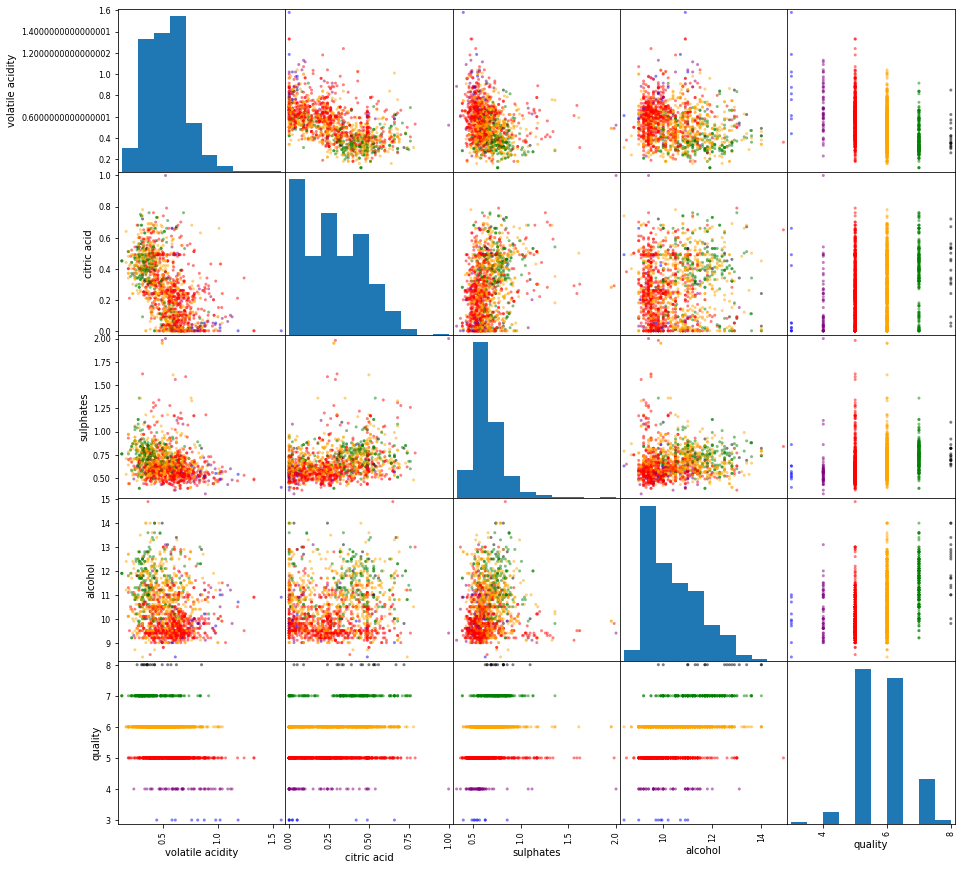

In [14]:
from pandas.plotting import scatter_matrix
%matplotlib inline

variables_relevantes = list(df_ref.axes[0])

aux = df[variables_relevantes]
aux['quality'] = df['quality']

dic_colors = { 3 : 'blue', 4 : 'purple', 5 : 'red', 6 : 'orange', 7 : 'green', 8 : 'black' }
colors = aux['quality'].map(dic_colors)

scatter_matrix(aux, figsize = (15, 15), diagonal = 'hist', color=colors)

RANDOM_STATE = RANDOM_STATE

Se puede ver que no hay ninguna variable que discrimine bien entre las clases (al contrario que pasaba en la parte 2 de la práctica con la variable ram). Sin embargo, es posible que el perceptrón multicapa encuentre relaciones no lineales entre las variables que no vemos a simple vista.

In [10]:
from sklearn.preprocessing import StandardScaler

variables_relevantes = list(df_ref.axes[0])

# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(df[variables_relevantes])
relevant_scaled=scaler_x.transform(df[variables_relevantes])

# Y también transformamos la variable de salida
target = df.loc[:, ['quality']].to_numpy()

scaler_y = StandardScaler()
scaler_y.fit(target.reshape(-1, 1))
target_scaled=scaler_y.transform(target.reshape(-1, 1))

Hacemos un StandardScaler porque la distribución de algunas de las variables que estamos considerando (sulphates, quiality y volatile acidity principalmente) se asemejan a normales. Además, al trabajar con redes neuronales es razonable reescalar los datos, ya que esto facilita la rápida convergencia del entrenamiento. Sin embargo, esto no suele hacer que disminuya considerablemente el error de la red neuronal, debido a que internamente la red neuronal puede realizar sus propios reescalados, llegando incluso a deshacer el nuestro.

### 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. 

Una vez tengas la curva de aprendizaje: 
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


Comenzamos con un perceptrón multicapa compuesto por 250 neuronas en una única capa oculta. Lo entrenamos y realizamos un proceso de validación cruzada para conseguir el mejor valor del parámetro alpha con ayuda de una curva de aprendizaje.

Después realizaremos entrenamientos con varias configuraciones diferentes para distribuir las 250 neuronas, analizando los resultados y comparando los perceptrones entre ellos.

#### Perceptrón 1: 1 capa oculta de 250 neuronas

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = np.concatenate((np.array([0.99,0.9,0.5]), 10.0 ** -np.arange(1, 8))) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, relevant_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.64588009192661,
  -0.6447070981666123,
  -0.6444746123723007,
  -0.6533248859997814,
  -0.6625849006385316,
  -0.6759952990312369,
  -0.6755782098323321,
  -0.6745110118290156,
  -0.6729858832723303,
  -0.6748463521846262],
 [0.034995532630498434,
  0.034971342204287936,
  0.03693540813552402,
  0.03677436397182994,
  0.03694827798195631,
  0.03608705800869163,
  0.03299460957208984,
  0.03347806317832844,
  0.03332959407358655,
  0.032740410061604594])

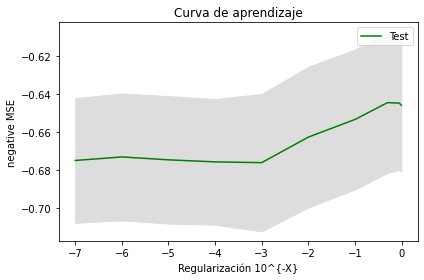

In [12]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [13]:
argmax = np.argmax(np.array([list(regul_param_range),list(cv_scores_mean)]), axis = 1)[1]
alpha = regul_param_range[argmax]
value = cv_scores_mean[argmax]
print("El valor maximo de alpha para este perceptrón es alpha = " + str(alpha) + " con MSE " + str(-value))

El valor maximo de alpha para este perceptrón es alpha = 0.5 con MSE 0.6444746123723007


Podemos observar un comportamiento muy estable para este perceptrón, con unos valores para el error cuadrático medio y para la desviación típica similares.

De elegir este perceptrón, tomaríamos el valor 0.5 como valor óptimo del parámetro alpha, ya que obtiene el menor MSE que se alcanza en el rango elegido y la desviación típica obtenida, si bien no es la menor, no difiere tanto de la menor como para justificar un cambio en la elección.

#### Perceptrón 2: 2 capas ocultas, la primera de 100 neuronas y la segunda de 150

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean2=[]
cv_scores_std2=[]

# Entrenar y validar distintas configuraciones
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100,150,), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, relevant_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean2.append(scores.mean())
    cv_scores_std2.append(scores.std())

cv_scores_mean2, cv_scores_std2

([-0.6430730880400046,
  -0.6433252023821365,
  -0.6511417567949047,
  -0.7127710124724177,
  -0.7927235450250107,
  -0.828781930516425,
  -0.8338273455983565,
  -0.8551921880221764,
  -0.8320084573348743,
  -0.8462257213052489],
 [0.033936671433768786,
  0.03357124309386687,
  0.0292467954893156,
  0.04968226263694763,
  0.08001578473705193,
  0.0563324234886608,
  0.0756290995441037,
  0.09325670971326135,
  0.06992763874871788,
  0.07477048310308236])

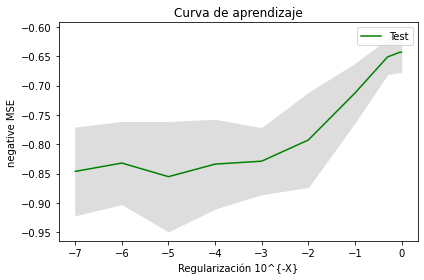

In [15]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean2, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean2) - np.array(cv_scores_std2)
upper_limit = np.array(cv_scores_mean2) + np.array(cv_scores_std2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [16]:
argmax2 = np.argmax(np.array([list(regul_param_range),list(cv_scores_mean2)]), axis = 1)[1]
alpha2 = regul_param_range[argmax2]
value2 = cv_scores_mean2[argmax2]
print("El valor maximo de alpha para este perceptrón es alpha = " + str(alpha2) + " con MSE " + str(-value2))

El valor maximo de alpha para este perceptrón es alpha = 0.99 con MSE 0.6430730880400046


Este perceptrón se comporta de una manera más volátil que el anterior. Además, a partir de alpha = 0.001, comienza a disminuir el error cuadrático medio de manera notable, alcanzándose de hecho el máximo en alpha = 0.99. Es decir, el perceptrón utiliza un valor muy alto del coeficiente de regularización. Por tanto, se dan unos pesos muy grandes, indicando que este perceptrón funciona mejor cuando interpreta que las variables están muy poco correlacionadas. La disminución de la desviación típica para valores altos de alpha apoya esta interpretación.

#### Perceptrón 3: 2 capas ocultas, la primera de 150 neuronas y la segunda de 100

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean3=[]
cv_scores_std3=[]

# Entrenar y validar distintas configuraciones
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(150,100,), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, relevant_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean3.append(scores.mean())
    cv_scores_std3.append(scores.std())

cv_scores_mean3, cv_scores_std3

([-0.643796567520502,
  -0.6432278764128027,
  -0.6457025899900334,
  -0.6794275318147698,
  -0.7761528538925326,
  -0.8167261094834437,
  -0.8409984457715204,
  -0.8291900257130124,
  -0.8236538122494416,
  -0.8280861099017249],
 [0.04496337556565491,
  0.04609617334780942,
  0.047406493434029445,
  0.02111910138291473,
  0.05787656633855685,
  0.05714702547676904,
  0.06573277536687852,
  0.07876098443577406,
  0.06778563153118486,
  0.07449019997168965])

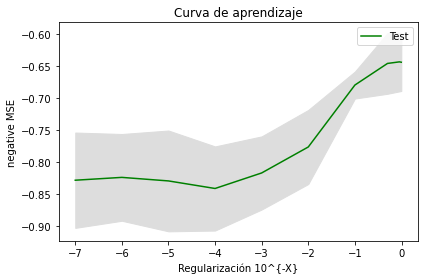

In [18]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean3, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean3) - np.array(cv_scores_std3)
upper_limit = np.array(cv_scores_mean3) + np.array(cv_scores_std3)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [19]:
argmax3 = np.argmax(np.array([list(regul_param_range),list(cv_scores_mean3)]), axis = 1)[1]
alpha3 = regul_param_range[argmax3]
value3 = cv_scores_mean3[argmax3]
print("El valor maximo de alpha para este perceptrón es alpha = " + str(alpha3) + " con MSE " + str(-value3))

El valor maximo de alpha para este perceptrón es alpha = 0.9 con MSE 0.6432278764128027


Este perceptrón es bastante similar al anterior, lo que era de esperar por tener unas capas ocultas parecidas. Sin embargo, aunque tiene algo más de estabilidad, el comportamiento general es ligeramente peor, especialmente en la desviación típica del valor óptimo del parámetro. Por tanto, para este problema parece ser mejor tener una primera capa con menos neuronas y una segunda con más que al revés.

Llama la atención sin embargo que para alpha = -1 se obtenga la menor desviación típica, de aproximadamente 0.21. Esto no quita que, de elegir este perceptrón, escogiéramos el valor de alpha de 0.9, ya que consideramos la diferencia entre los MSE más relevante.

#### Perceptrón 4: 5 capas ocultas de 50 neuronas

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean4=[]
cv_scores_std4=[]

# Entrenar y validar distintas configuraciones
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(50,50,50,50,50,), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, relevant_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean4.append(scores.mean())
    cv_scores_std4.append(scores.std())

cv_scores_mean4, cv_scores_std4

([-0.6571666712208122,
  -0.658493805837246,
  -0.6678788300468373,
  -0.8763137206074987,
  -1.0044535004961408,
  -1.1167962963366613,
  -1.0352398342724227,
  -1.0993250080343264,
  -1.054703977186906,
  -1.036155328283264],
 [0.04960155826426334,
  0.04991378046596126,
  0.029072049518008826,
  0.08240096565254355,
  0.1725833256995049,
  0.11411732868259963,
  0.10065214082411403,
  0.10782120406008718,
  0.08638332539567051,
  0.093527240578173])

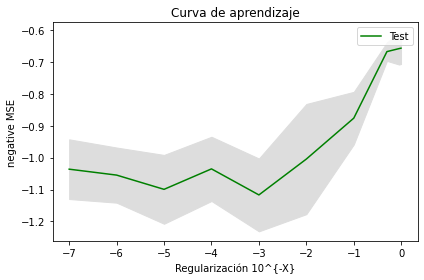

In [21]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean4, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean4) - np.array(cv_scores_std4)
upper_limit = np.array(cv_scores_mean4) + np.array(cv_scores_std4)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [22]:
argmax4 = np.argmax(np.array([list(regul_param_range),list(cv_scores_mean4)]), axis = 1)[1]
alpha4 = regul_param_range[argmax4]
value4 = cv_scores_mean4[argmax4]
print("El valor maximo de alpha para este perceptrón es alpha = " + str(alpha4) + " con MSE " + str(-value4))

El valor maximo de alpha para este perceptrón es alpha = 0.99 con MSE 0.6571666712208122


Este es indudablemente el perceptrón más volátil de todos con los que hemos trabajado, ya que el error cuadrático medio varía enormemente para valores próximos de alfa, y no siguiendo una tendencia clara al considerar todo el espectro. Las diferencias entre los errores cuadráticos medios para diferentes valores de alpha llegan a superar 0.4, lo que supone alrededor de un 40% de los valores obtenidos. De la misma forma, la desviación típica también es muy diferente según el valor de alpha considerado.

Además, este perceptrón obtiene los peores resultados para todo el espectro de alfa, siendo la diferencia más notable para los valores menores a 0.01.

#### Decisión

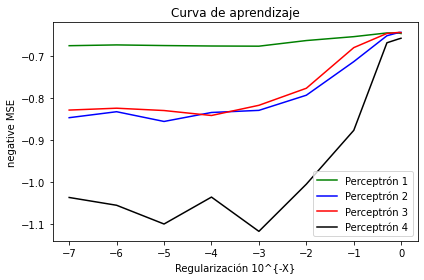

In [23]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Perceptrón 1")
plt.plot(np.log10(regul_param_range), cv_scores_mean2, color="b", label="Perceptrón 2")
plt.plot(np.log10(regul_param_range), cv_scores_mean3, color="r", label="Perceptrón 3")
plt.plot(np.log10(regul_param_range), cv_scores_mean4, color="k", label="Perceptrón 4")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

En esta gráfica podemos ver cómo el perceptrón con una única capa claramente domina a los demás, salvo quizás para los valores muy altos del espectro en el que se mueve el parámetro. Además, es el más estable de todos con mucha diferencia, apenas variando los resultados entre los distintos valores de alpha.

Después tenemos los perceptrones con 2 capas ocultas, que se comportan de manera muy similar y también dominan al perceptrón de 5 capas, que es el menos estable y el que obtiene peores resultados.

Vamos a hacer un zoom en la parte de la gráfica correspondiente a los valores más altos.

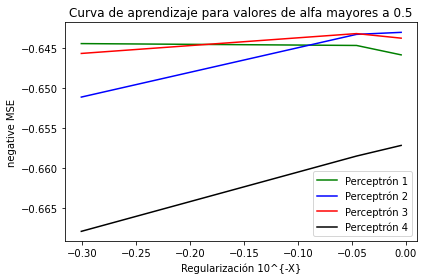

In [24]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range[0:3]), cv_scores_mean[0:3], color="g", label="Perceptrón 1")
plt.plot(np.log10(regul_param_range[0:3]), cv_scores_mean2[0:3], color="b", label="Perceptrón 2")
plt.plot(np.log10(regul_param_range[0:3]), cv_scores_mean3[0:3], color="r", label="Perceptrón 3")
plt.plot(np.log10(regul_param_range[0:3]), cv_scores_mean4[0:3], color="k", label="Perceptrón 4")

# Creamos el gráfico
plt.title("Curva de aprendizaje para valores de alfa mayores a 0.5")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

En esta segunda gráfica observamos que para los valores altos de alpha ya no es el perceptrón de una sola capa el que domina, sino que el que acaba teniendo un mejor resultado es el 2 (ligeramente por encima de los demás), seguido del 3 y después del 1. Es decir, para este problema, si se elige adecuadamente el valor de alpha, parece ser mejor tener dos capas ocultas que una.

In [25]:
alpha_list = [alpha, alpha2, alpha3, alpha4]
value_list = [value, value2, value3, value4]
opt = np.argmax(np.array([alpha_list, value_list]), axis = 1)
regul_param = alpha_list[opt[1]]
print("El valor óptimo se alcanza para el perceptrón " + str(opt[1] + 1) + " con alpha = " + str(regul_param))

El valor óptimo se alcanza para el perceptrón 2 con alpha = 0.99


Según los resultados obtenidos, observamos que el mejor perceptrón de entre todos los obtenidos es el 2, lo que corresponde al perceptrón multicapa con 2 capas ocultas, la primera de 100 neuronas y la segunda de 150.

En general, y basándonos en los resultados de los 4 perceptrones, para este problema los valores altos de alpha parecen tener un mejor comportamiento que los valores bajos. El perceptrón óptimo no es una excepción, siendo su valor óptimo del parámetro alpha 0.99, el más alto del espectro que hemos considerado.

#### Nos quedamos por tanto con el perceptrón multicapa con 2 capas ocultas, la primera de 100 y la segunda de 150, y el valor de alpha = 0.99.

### 5) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada. 

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Para ello, dibuja un diagrama de dispersión con los valores predichos por el modelo y los valores reales (la diagonal representa error 0). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones.

Con la mejor configuración elegida en el apartado anterior (perceptrón multicapa con 2 capas ocultas, la primera de 100 y la segunda de 150, y el valor de alpha = 0.99) procedemos a realizar validación cruzada para hacer predicciones de la calidad de todos los vinos.

In [26]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
mlp = MLPRegressor(hidden_layer_sizes=(100,150,), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

# estimamos 
predicts_scaled = cross_val_predict(mlp, relevant_scaled, target_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled)
predicts

array([5.09224342, 5.10550534, 5.2297768 , ..., 6.06943926, 5.5911133 ,
       6.18771508])

In [27]:
errors = np.abs(df["quality"] - predicts) # error en cada ejemplo
    
df_errors = df
df_errors['error'] = df["quality"] - predicts

mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(df['quality'])

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 0.5067812392214184
Desviación típica: 0.4069393645406326
Error medio en %: 8.991824251165646


En vista a los resultados obtenidos, podemos decir que el error medio es prácticamente de un 9% lo que se traduce en que la calificación de los vinos varía en media alrededor de medio punto respecto a su clase real. A priori este error es aceptable porque los saltos en las clases son de una unidad, y equivocarse en medio punto consideramos que es perfectamente asumible. Sin embargo esta información es limitada ya que no nos indica en qué clases se están produciendo los fallos ni cuál es la magnitud de cada uno de estos fallos en cada una de las clases.

Para profundizar más en nuestro análisis, mostramos en primer lugar la distribución del error (en valor absoluto) sin distinción alguna en las clases.

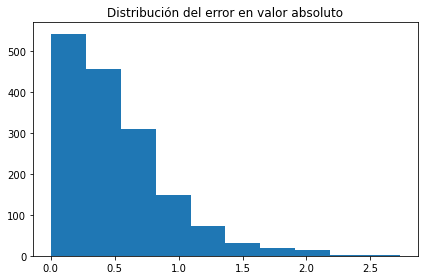

In [33]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.tight_layout()
plt.show()

Podemos observar que una amplia mayoría de los errores que se cometen son errores pequeños, es decir, de menos de un punto en la calificación final del vino. Sin embargo, para algunos (pocos) casos el error puede ser superior a dos puntos. Es conveniente graficar la distribución del error en cada una de las clases para ganar intuición sobre lo que está ocurriendo. Además, en esta ocasión prescindimos del valor absoluto, porque, además de la magnitud del error, nos interesa saber si este error se está produciendo por subestimar o sobrestimar la calidad del vino. Para esto hay que tener en cuenta que un error negativo indica sobreestimación y un error positivo indica subestimación.

array([[<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>]], dtype=object)

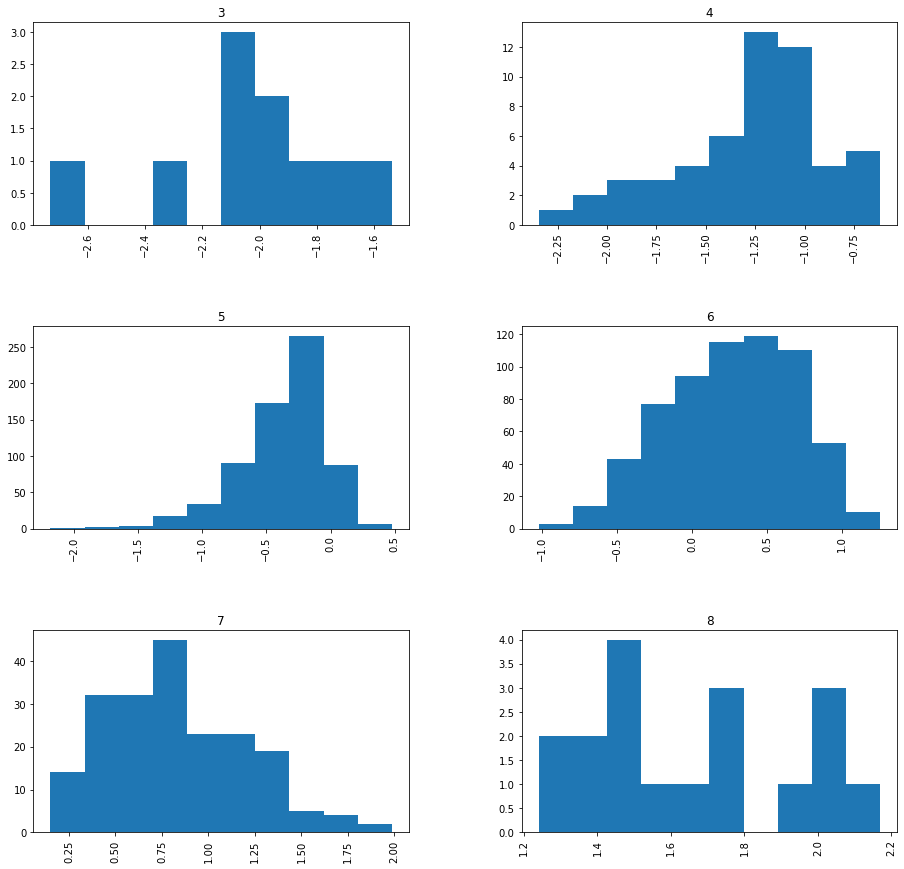

In [29]:
df_errors.hist('error', by='quality', figsize = (15,15))

En primer lugar hacemos notar la importancia de la escala a la hora de interpretar los datos. Cabe recordar que las clases no están equilibradas (de hecho ni siquiera hay datos de las clases 0, 1 y 2 ni de la 9 y 10). Esto se hace patente en los distintos valores que aparecen en el eje de ordenadas de cada gráfico. Por ejemplo, para la clase 3, únicamente 3 individuos han tenido un error ligeramente superior a dos puntos (el más común), mientras que para la clase 6, de la cual tenemos muchos datos, del orden de 20 individuos han tenido un error de algo menos de un punto, lo que a primera vista podría resultar despreciable si, como insistimos, no nos fijamos en la escala. Análogamente para el eje X, observamos que para la clase 8 no hay ningún error inferior a 1 punto.

Una vez hecha esta observación analizamos en detalle cada una de las clases:

### Clases 3 y 4
Tiene muy pocos individuos y la regresión es muy poco satisfactoria. La magnitud del error es muy considerable, de en torno a 2 puntos en la clase 3 y 1 en la clase 4 y además, en ambos casos siempre sobreestima.
### Clases 5 y 6
Las más numerosas y para las que la regresión es buena. La distribución del error se asemeja a una normal en ambos casos de medias -0.25 y 0.5 aproximadamente. Esto hace que en algunos casos sobreestime y en otros subestime. La gran cantidad de individuos en estas clases y el hecho de que el error sea pequeño hace que estas dos clases bajen mucho la tasa de error media en el sistema.
### Clase 7
Tiene un número de individuos medio-bajo y en este caso la distribución del error sigue una normal centrada en 0.75. Este error podría ser considerado aceptable pero cabe destacar que en ningún caso la predicción coincide con la calidad real del vino y que el error llega a ser de hasta 2 puntos. Para esta clase siempre se subestima.
### Clase 8
Tiene un número de individuos bajo, similar al de las clases 3 y 4, y esto se traduce en un comportamiento similar: el error es demasiado alto. En este caso, en lugar de sobreestimar, subestima.

Mostamos un último gráfico antes de presentar las conclusiones finales. Este gráfico tiene en el eje X cada una de las clases a las que pertenece cada individuo y en el eje Y la predicción que se ha hecho para ese individuo. De esta forma, la recta coloreada de negro indicaría la predicción que se debería haber hecho, es decir, para cada individuo de cada clase, que se predijera esa misma clase. Adicionalmente, hemos incluído en color rojo la media de las predicciones para cada clase y el umbral relativo a la desviación típica.

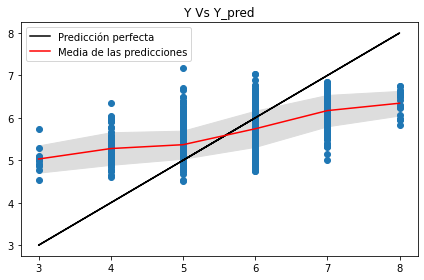

In [40]:
# Pintamos la referencia de la predicción perfecta
plt.plot(df["quality"], df["quality"], color='k', label = 'Predicción perfecta')

# Pintamos la media de la predicción
df_errors['predicts']=predicts
plt.plot(df_errors.groupby('quality').mean('predicts')['predicts'], color='red', label = 'Media de las predicciones')

# Pintamos el umbral de desviación típica
lower_limit = df_errors.groupby('quality').mean('predicts')['predicts'] - df_errors.groupby('quality').std()['predicts']
upper_limit = df_errors.groupby('quality').mean('predicts')['predicts'] + df_errors.groupby('quality').std()['predicts']
lower_limit, upper_limit
plt.fill_between(range(3,9), lower_limit, upper_limit, color="#DDDDDD")

# dibujamos los errores: la distancia a la recta indica el nivel de error
plt.scatter(df["quality"], predicts) 
plt.title('Y Vs Y_pred'), plt.legend(loc="best")
plt.tight_layout()
plt.show()

En este gráfico podemos observar claramente los fenomenos de sobreestimación y subestimación. Los puntos que están encima de la recta son aquellos para los que se ha sobreestimado la calidad del vino y los que están debajo, son para los que se ha subestimado. De esta manera, se puede comprender de forma más visual que para las clases 3 y 4 la predicción siempre sobrestima y para las clases 7 y 8 siempre subestima. Para las clases 5 y 6, según hemos visto ya, la predicción es más ajustada y se distribuye aproximadamente alrededor del valor que debería predecir.

Al mirar el gráfico salta a la vista que todos las predicciones están en el rango [4.5 , 7], independientemente de la clase a la que pertenzca. Al fijarnos en la traza roja, que representaba la media de las predicciciones podemos darnos cuenta de por qué sucede esto. La traza está demasiado aplanada, es decir, las media de las predicciones varían muy poco respecto a las distintas clases. De hecho, las medias de las predicciones se mueven únicamente en el rango [5,6] lo que refleja que el comportamiento del predictor no es el deseado cuando se están prediciendo clases del 3 al 8. Lo ideal sería que la traza roja estuviera lo más pegada posible a la recta negra. En nuestro caso, esto solo sucede para las clases 5 y 6, mientras que para el resto la diferencia es notable.

Concluimos dando una explicación verosímil sobre lo que está sucediendo. Podemos resumirla informalmente en que el perceptrón multicapa ha aprendido únicamente a predecir que la clase de los vinos es "siempre" 5 o 6. Esto se debe a que la distribución original de los datos no es en absoluto uniforme, y eran las clases 5 y 6 las que contaban con un mayor número de individuos. Por tanto, es más tendente a predecir valores cercanos a ese rango. La utilidad de este modelo de cara a realizar una regresión dependerá en gran medida de la distribución de los datos que pueda recibir. Si asumimos que la mayor parte de los vinos son de clases 5 y 6 (como ocurría en nuestro dataset) entonces el clasificador se comportará correctamente porque ha sido entrenado con datos similares. Sin embargo, cuando le llegue un vino cuya calidad real esté alejada de las clases 5 o 6, si esta calidad es menor que 5 entonces el predictor tenderá a sobrestimar su calidad con un valor cercano a 5. Y al contrario, si esta calidad es superior a 6 entonces la predicción dará un valor cercano a 6.

Por tanto, el perceptrón multicapa ha aprendido a llevar a los valores medios las calidades, que es lo máximo que probablemente pueda aprender con este dataset. Si quisieramos un comportamiento mejor, más parecido al esperado, entonces habría que ampliar el dataset incluyendo más datos de vinos de calidades bajas y altas además de las medias que ya hay o eliminar datos de vinos de calidades medias. Alternativamente, se podrían hacer varios predictores (uno para vinos de baja calidad, otro para vinos de calidad media y otro para vinos de calidad alta) con la esperanza de que fueran más precisos y un clasificador para distinguir entre vino de calidad baja, calidad media o calidad alta.